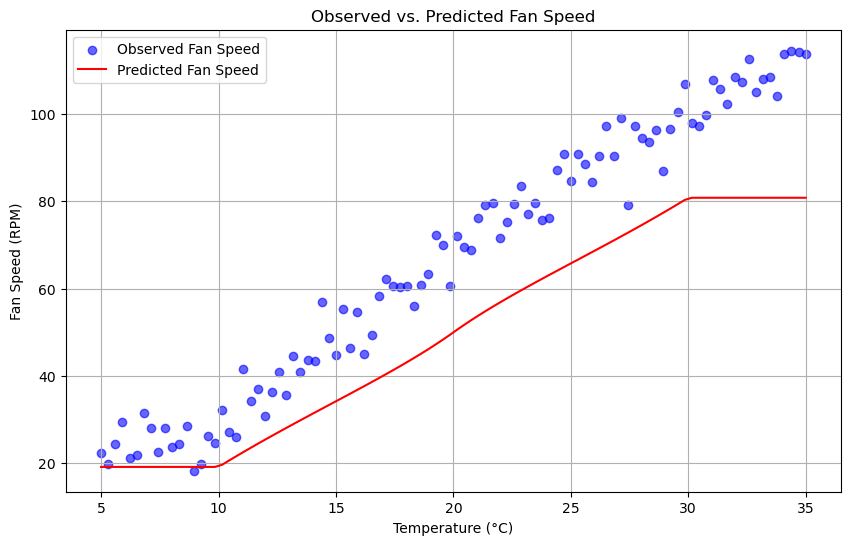

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv('fan_speed_dataset.csv')

# Membership Functions for Temperature
def cold(temp):
    return max(0, min(1, (20 - temp) / 10))

def medium(temp):
    return max(0, min(1, (temp - 10) / 10, (30 - temp) / 10))

def hot(temp):
    return max(0, min(1, (temp - 20) / 10))

# Membership Functions for Fan Speed
def slow(speed):
    return max(0, min(1, (50 - speed) / 25))

def med(speed):
    return max(0, min(1, (speed - 25) / 25, (75 - speed) / 25))

def fast(speed):
    return max(0, min(1, (speed - 50) / 25))

# Mamdani Fuzzy Inference System
def mamdani_FIS(temp):
    # Rule Evaluation
    r1 = cold(temp)
    r2 = medium(temp)
    r3 = hot(temp)

    # Aggregation
    aggregated = [max(min(r1, slow(speed)), min(r2, med(speed)), min(r3, fast(speed))) for speed in range(101)]

    # Defuzzification (using centroid method)
    numerator = sum([speed * membership for speed, membership in enumerate(aggregated)])
    denominator = sum(aggregated)

    return numerator / denominator if denominator != 0 else 0

# Apply the Mamdani FIS to the dataset
df['Predicted Fan Speed'] = df['Temperature'].apply(mamdani_FIS)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['Observed Fan Speed'], color='blue', label='Observed Fan Speed', alpha=0.6)
plt.plot(df['Temperature'], df['Predicted Fan Speed'], 'r-', label='Predicted Fan Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Fan Speed (RPM)')
plt.title('Observed vs. Predicted Fan Speed')
plt.legend()
plt.grid(True)
plt.show()

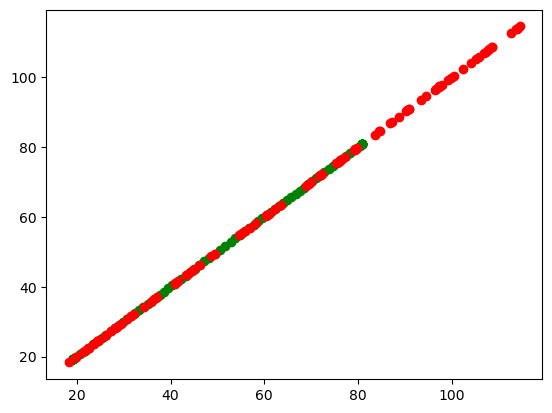

In [22]:
plt.scatter(df['Predicted Fan Speed'],df['Predicted Fan Speed'], color = "green")
plt.scatter(df['Observed Fan Speed'], df['Observed Fan Speed'], color = 'red')

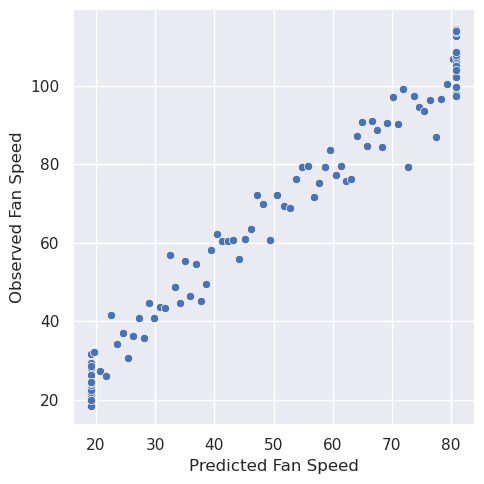

In [2]:
import seaborn as sns
sns.set_theme()

sns.relplot(x = df['Predicted Fan Speed'], y = df['Observed Fan Speed'])